In [17]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("Set2")

In [18]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, random_state=6)
points = pd.DataFrame(x, y).reset_index(drop=True)
points.columns = ["x", "y"]
points.head()

,x,y
0,0.276181,-2.217047
1,7.927368,-9.761527
2,8.491428,-2.549749
3,-11.537102,2.434883
4,4.292259,-8.992204


In [19]:
from sklearn.cluster import KMeans 

# k-means clustering 실행
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)

# 결과 확인
result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()

,x,y,cluster
0,0.276181,-2.217047,2
1,7.927368,-9.761527,1
2,8.491428,-2.549749,3
3,-11.537102,2.434883,0
4,4.292259,-8.992204,1


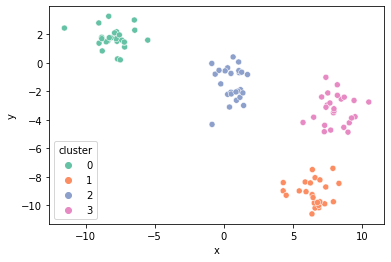

In [20]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result_by_sklearn, palette="Set2")

## 다른 방법


In [21]:
from sklearn import datasets

import pandas as pd

iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)
feature = data[ ['Sepal length','Sepal width']]
feature.head()


,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns


# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']


In [23]:
# 클러스터링시, 클러스터의 라벨은 자동으로 0,1,2로 지정되는데, 
# 이 순서는 학습을 할때 마다 임의로 변경이 될 수 있다.  
# 클러스터링 된 라벨과 Sepal length, Sepal width를 하나의 데이타 프레임 r에  저장해서 출력해보자

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

In [24]:
# plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)

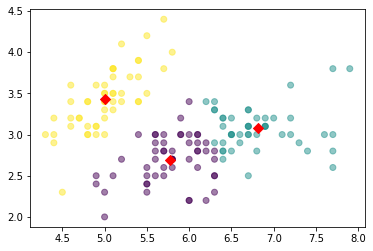

In [25]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()